# <center>Lecture 19 -- Monte Carlo Methods</center>

Sometimes we can use randomness to estimate a known probability distribution or quantity like an integral

Example: suppose we have an known continuous probability distribution like 
$$f(x) = \frac{x+1}{12}\exp\left(-\frac{(x-1)^2}{2x}\right),\quad x>0.$$

Let's plot it first to see what it looks like

In [2]:
import numpy as np
from matplotlib import pyplot as plt

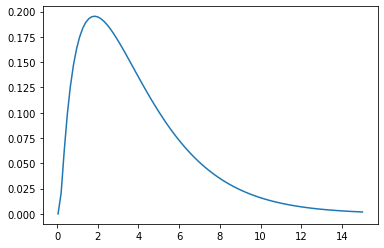

In [3]:
# Graph function from .05 to 20 

x = np.linspace(.05, 15, 100)
y = (x+1)/12*np.exp(-(x-1)**2/(2*x))

plt.plot(x,y)
plt.show()

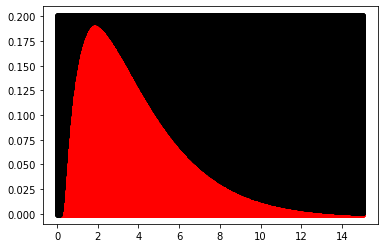

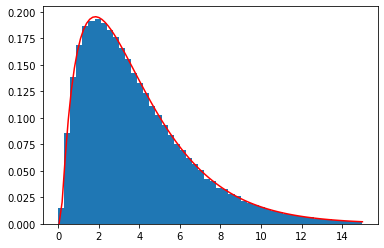

In [21]:
# We will make a box [.05,15]x[0,.2]
# Question: How do we draw points in this box uniformly at random

num_points = 1000000
x_coords = np.random.uniform(.05,15,num_points)
y_coords = np.random.uniform(0,.2,num_points)
points = np.array([x_coords, y_coords])

# Compute f(x) for x in x_coords
y_actual = (x_coords+1)/12*np.exp(-(x_coords-1)**2/(2*x_coords))

# Plot accepted points (below f(x)) in red and rejected points (above f(x)) in black
plt.scatter(x_coords[y_coords<=y_actual],y_coords[y_coords<=y_actual],c='r')
plt.scatter(x_coords[y_coords>y_actual],y_coords[y_coords>y_actual],c='k')
plt.show()

# Plot this as a histogram
plt.plot(x,y,'r')
x_accepted = x_coords[y_coords<=y_actual]
plt.hist(x_accepted,bins=50,range=(0,15),density=True)
plt.show()


In [5]:
points.shape

(2, 10)

In [7]:
print(points[:,range(5)])

[[ 5.78967031 12.88270275 11.08288971 10.04447489 11.78146077]
 [ 0.19450016  0.02041257  0.14190734  0.03211874  0.14799129]]


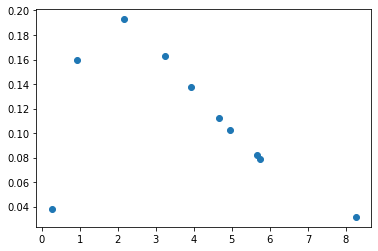

In [11]:
plt.scatter(x_coords,y_actual)
plt.show()

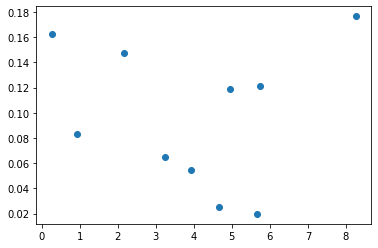

In [12]:
plt.scatter(x_coords,y_coords)
plt.show()

In [13]:
x_coords[y_coords<=y_actual]

array([5.64850156, 3.23681127, 2.16080655, 3.93564645, 0.92306118,
       4.66346616])

## Monte Carlo Integration
Let's $\frac{1}{\sqrt{2\pi}}\int_{-1}^1 e^{-\frac{x^2}{2}}dx$

In [80]:
num = 10000
xx = np.random.uniform(-1,1,num)
yy = np.exp(-xx**2/2)/np.sqrt(2*np.pi)

integral_estimate = 2*np.mean(yy)
print(integral_estimate)

0.682717388395433


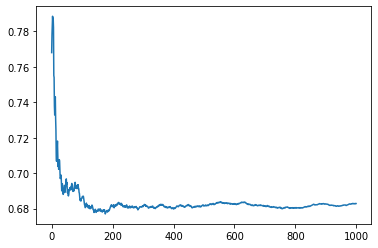

In [86]:
# Compute the integral estimate as a running average, and plot the integral_estimate as a function 
# of the number of samples. In the end, you should have a curve

num2 = 1000
xx2 = np.random.uniform(-1,1,num2)
yy2 = np.exp(-xx2**2/2)/np.sqrt(2*np.pi)

running_avg = np.zeros(num2)
running_avg[0] = yy2[0]
running_avg[1] = .5*(yy2[0]+yy2[1])
for i in range(2,num2):
    running_avg[i] = (i-1)/i*(running_avg[i-1])+yy2[i]/i
plt.plot(range(num2),2*running_avg)
plt.show()

## Estimating pi
One can show $\int_{-\infty}^\infty e^{-x^2}dx = \sqrt{\pi}$

In [1]:
num = 100000000
a = -6
x_points = np.random.uniform(-a,a,num)
y_points = np.exp(-x_points**2)
integral_estimate = 2*a*np.mean(y_points)
print("pi is approximately", integral_estimate**2)

NameError: name 'np' is not defined

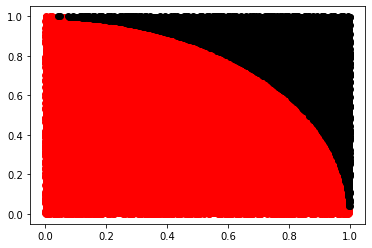

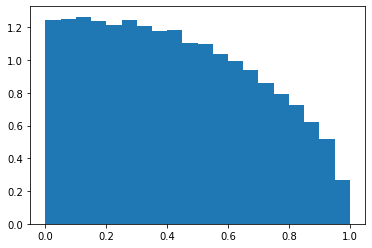

3.14748


In [17]:
# We will make a box [.05,15]x[0,.2]
# Question: How do we draw points in this box uniformly at random

num_points = 100000
x_coords = np.random.uniform(0,1,num_points)
y_coords = np.random.uniform(0,1,num_points)
points = np.array([x_coords, y_coords])

# Compute f(x) for x in x_coords
y_actual = np.sqrt(1-x_coords**2)   #(x_coords+1)/12*np.exp(-(x_coords-1)**2/(2*x_coords))

# Plot accepted points (below f(x)) in red and rejected points (above f(x)) in black
plt.scatter(x_coords[y_coords<=y_actual],y_coords[y_coords<=y_actual],c='r')
plt.scatter(x_coords[y_coords>y_actual],y_coords[y_coords>y_actual],c='k')
plt.show()

#Estimate the ratio of area of quarter circle to square
x_accepted = x_coords[y_coords<=y_actual]
y_accepted = y_coords[y_coords<=y_actual]
plt.hist(x_accepted,bins=20,range=(0,1),density=True)
plt.show()

# Estimate pi
pi_approx = 4*x_accepted.shape[0]/num_points
print(pi_approx)

# Plot this as a histogram
# plt.plot(x,y,'r')
# x_accepted = x_coords[y_coords<=y_actual]
# plt.hist(x_accepted,bins=50,range=(0,15),density=True)
# plt.show()


In [10]:
x_accepted.shape

(7836,)

In [11]:
np.sum(x_accepted!=0)

7836

In [12]:
x_accepted!=0

array([ True,  True,  True, ...,  True,  True,  True])